<a href="https://colab.research.google.com/github/VipulR2796/dimensionality_reduction_feature_selection/blob/main/Crash_Course_in_Statistical_Learning_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction**


## What is Dimensionality Reduction?

We are generating a tremendous amount of data daily. In fact, 90% of the data in the world has been generated in the last 3-4 years! The numbers are truly mind boggling. Below are just some of the examples of the kind of data being collected:

- Facebook collects data of what we like, share, post, places you visit, restaurants we like, etc.
- Smartphone apps collect a lot of personal information about us
- Amazon collects data of what we buy, view, click, etc. on their site
- Casinos keep a track of every move each customer makes

The abundance of data in current datasets is a challenge for researchers, as it requires the development of clever algorithms to extract important information effectively. Here the curse of dimensionality comes into the picture;  this phenomenon occurs in data analysis when dealing with high-dimensional data. In high-dimensional spaces, the data becomes more sparse and the distances between points become more similar, making it difficult to distinguish between different classes or patterns.

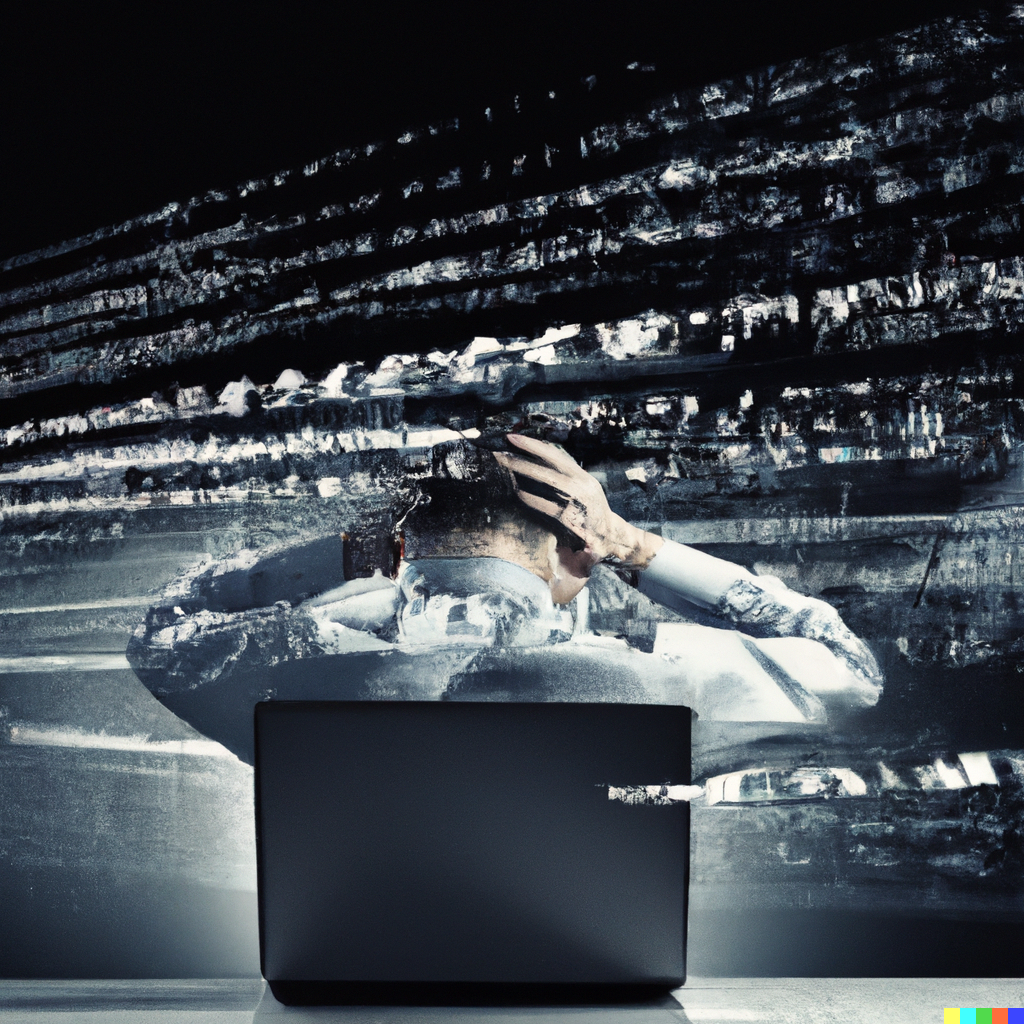

## Curse of Dimensionality

*Overfitting*: In high-dimensional spaces, models can easily fit to noise in the data rather than the underlying patterns.

*Computational difficulties*: Some algorithms can become computationally expensive or infeasible when dealing with high-dimensional data.

Difficulty in visualizing the data: It becomes challenging to visualize high-dimensional data, making it difficult to understand the relationships between variables.

Hence, before the process of constructing data models can begin pre-processing steps are necessary to reduce the size of the dataset and adapt it for analysis with specific methods. Pre-processing includes various methods such as dimensionality reduction or feature selection which aim at reducing complexity by removing redundant features from a given set without sacrificing accuracy too much.

## Main Approaches for Dimensionality Reduction 
**Projection** 

Projecting high dimensional data on a low dimentional hyperplane, minimizing the variance. (PCA)

**Manifold Learning**

In many cases where the subspace may twist and turn(Swiss roll), projection is not the best approach to dimensionality reduction. Manifold Learning techniques measures how each training instance linearly relates to its closest neighbors, then it looks for a low-dimensional representation of the training set where these local relationships are best preserved. (T-SNE)

This notebook will aim to provide an introductory exposition on followin 3 methods as well as to portray their visualisations interactively and more intuitively via the Plotly visualisation library. 

Principal Component Analysis ( PCA ) - Unsupervised, linear method, Projection
Linear Discriminant Analysis (LDA) - Supervised, linear method
t-distributed Stochastic Neighbour Embedding (t-SNE) - Nonlinear, probabilistic method, manifold learning

## Importing required libraries

In [ ]:
import numpy as np 
import pandas as pd 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
from plotly.subplots import make_subplots
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from IPython.display import display, Math, Latex

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, explained_variance_score, confusion_matrix


MNIST Dataset

I will be using the MNIST (Mixed National Institute of Standards and Technology) computer vision digit dataset due to its simplicity and also deep and informative research that can be done with the dataset. 

In [ ]:
main_data = pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')
train_df = main_data
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape

(42000, 785)

The MNIST set consists of 42,000 rows and 785 columns. There are 28 x 28 pixel images of digits ( contributing to 784 columns) as well as one extra label column which is essentially a class label to state whether the row-wise contribution to each digit gives a 1 or a 9. Each row component contains a value between one and zero and this describes the intensity of each pixel.

In [ ]:
# save the labels 
target = train_df['label']
# Drop the label feature
train_df = train_df.drop("label",axis=1)


# Principal Component Analysis(PCA)
PCA is a widely used technique for linear dimensionality reduction. It identifies the directions of maximum variance in the data and projects the data onto these directions, called principal components.

In dimensionality reduction, its primary goal is to reduce the number of variables (dimensions) in a dataset while still retaining as much of the variance in the data as possible. This is accomplished by projecting the original data onto a smaller number of orthogonal dimensions, or principal components, that capture the majority of the variation in the data.

On the other hand, when PCA is used for feature extraction, the goal is to transform the original variables into a new set of variables that better capture the underlying structure of the data. In this case, the principal components are used as new features that can be used in downstream analysis. This approach can be useful when the original variables are not informative enough for a given task or when there are too many variables to handle efficiently.

So, while the basic mathematical technique of PCA is the same in both cases, the specific goals and the ways in which the results are used can differ.

## Calculating the Eigenvectors
Now it may be informative to observe how the variances look like for the digits in the MNIST dataset. Therefore to achieve this, let us calculate the eigenvectors and eigenvalues of the covarience matrix as follows:
\

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train_df.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [ ]:

trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
#     hoverinfo= cum_var_exp,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
#     hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')

fig.show(renderer="colab")

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Interpretation

The plot includes two subplots, one small and embedded within the larger plot. The smaller plot displays the distribution of individual and explained variances across all features, represented in green and red, while the larger plot, represented in golden and black, focuses on a zoomed-in section of the explained variances. The plot reveals that about 90% of the explained variance can be accounted for by just over 200 features out of a total of 784. Therefore, if one were to apply PCA, selecting the top 200 features would be a sensible approach as they already capture the majority of the data. In the next section, the Sklearn toolkit and its built-in PCA method will be used. However, due to the abundance of available resources on implementing PCA from scratch, this article will not cover it. Interested readers can refer to an excellent article on this topic.

In [ ]:
n_components = 28
pca = PCA(n_components=n_components).fit(train_df.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)


eigenvalues = pca.components_

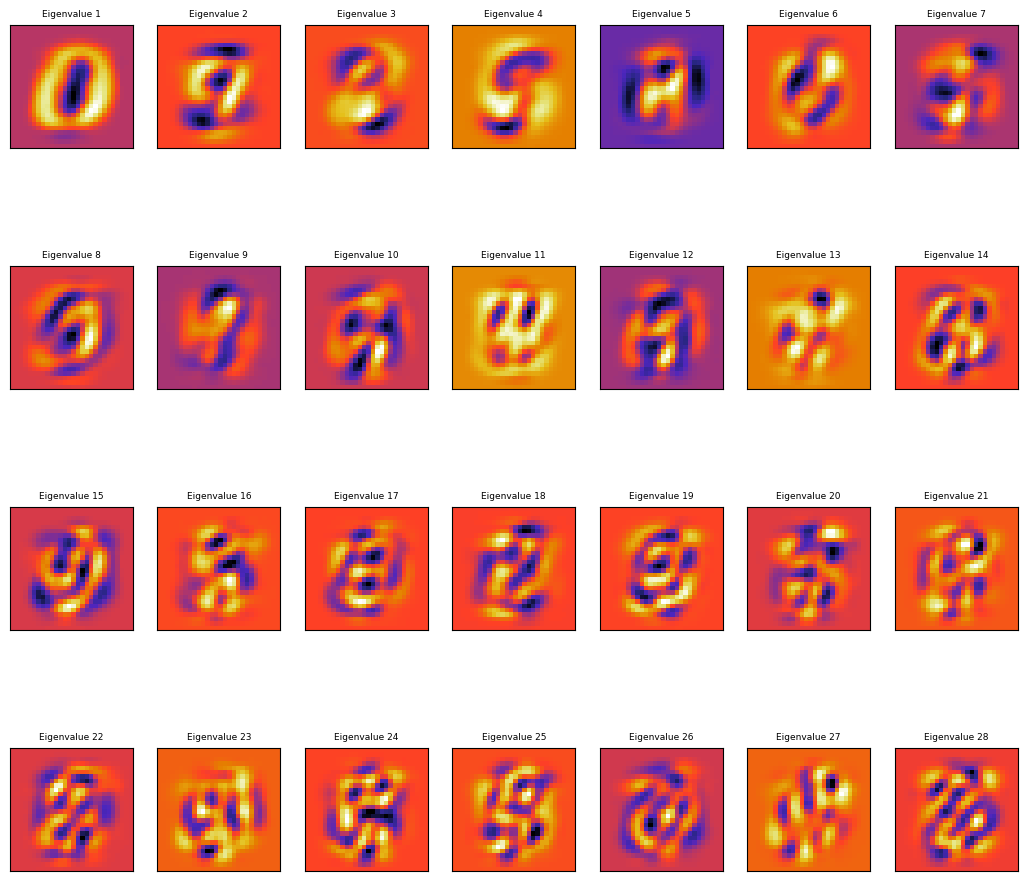

In [ ]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='CMRmap')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

The plots above depict the 30 most suitable principal component axes that have been produced by the PCA method for our digit dataset. It is noteworthy that as we compare the first component "Eigenvalue 1" with the 28th component "Eigenvalue 28", it becomes clear that more intricate directions or components are being created to enhance the variance in the newly formed feature subspace.

Visualizing MNIST Digital digits

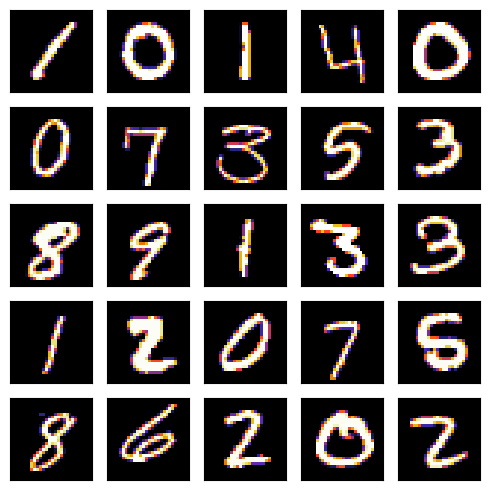

In [ ]:
plt.figure(figsize=(5,5))
for digit_num in range(0,25):
    plt.subplot(5,5,digit_num+1)
    grid_data = train_df.iloc[digit_num].values.reshape(28, 28)

    plt.imshow(grid_data, interpolation = "none", cmap = "CMRmap")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## PCA Implementation

In [ ]:
del X
# Taking only the first 5000 rows to make it faster
X= train_df[:5000].values
# del train_df
# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)


Target = target[:5000]

I have first normalised the data using StandardScaler.

Fit and transform methods which fits the PCA model with the standardised digit data set and then does a transformation by applying the dimensionality reduction on the data.

## Visual Representation of PCA

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# create a scatter plot trace using the first two principal components of X_5d
trace_pca = go.Scatter(
    x = X_5d[:,0],  # x values are the first principal component of X_5d
    y = X_5d[:,1],  # y values are the second principal component of X_5d
    mode = 'markers',  # set mode to markers for a scatter plot
    text = Target,  # set text to the target variable values
    showlegend = False,  # hide the legend
    marker = dict(
        size = 8,  # set marker size
        color = Target,  # set marker color to target variable values
        colorscale ='Viridis', 
        symbol = 'circle',
        showscale = False,  # hide the color scale
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)

# create a layout for the plot
layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',  # set plot title
    hovermode= 'closest',  # set hover mode to closest
    xaxis= dict(
         title= 'First Principal Component',  # set x axis title
        ticklen= 5,
        gridwidth= 1,
        showgrid = True,
        gridcolor = 'lightgrey'
    ),
    yaxis=dict(
        title= 'Second Principal Component',  # set y axis title
        ticklen= 5,
        gridwidth= 1,
        showgrid = True,
        gridcolor = 'lightgrey'
    ),
    showlegend= True  # show the legend
)

# create a figure object and add the trace and layout to it
fig_pca = go.Figure(data=[trace_pca], layout=layout)
fig_pca.show(renderer="colab")


##Interpretation 

Looking at the scatter plot, it can be noticed thatseveral distinct groups of colors that roughly correspond to different digits. 

These clusters may lead one to believe that implementing PCA and visualizing the results is a straightforward task. However, the devil is in the details of the Python code, because PCA is an unsupervised method that doesn't rely on class labels. In this case, I added class labels to generate the scatter plot and create the color clusters.

## K-Means Clutering to identiy classes

In [ ]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=9)

# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_5d)

trace_Kmeans = go.Scatter(x=X_5d[:, 0], y= X_5d[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Viridis',
                            symbol = 'circle',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        gridwidth= 1,
        showgrid = True,
        gridcolor = 'lightgrey'
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 1,
        showgrid = True,
        gridcolor = 'lightgrey'
    ),
    showlegend= True
)

data = [trace_Kmeans]
fig1 = go.Figure(data=data, layout= layout)
fig1.show(renderer = "colab")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



##Interpretation

From a visual standpoint, the clusters produced by the KMeans algorithm seem to offer a more distinct separation among the clusters compared to simply incorporating class labels into our PCA projections.

This is because PCA is meant to be an unsupervised method and therefore not optimised for separating different class labels. This particular task however is accomplished by the LDA method which will explained below.

# **Linear Discriminant Analysis (LDA)**

LDA stands for Linear Discriminant Analysis, which is a supervised learning algorithm used for classification problems. It is a dimensionality reduction technique that projects the original high-dimensional data onto a lower-dimensional space while maximizing the separation between the classes or groups in the data. The goal of LDA is to find a linear combination of features that characterizes or discriminates between different classes or groups in the data. It does this by maximizing the ratio of the between-class variance to the within-class variance of the projected data. In essence, LDA aims to find the most informative features that separate the classes while ignoring the features that are not discriminative. LDA has many applications in areas such as image recognition, bioinformatics, and finance.

## LDA Implementation

The objective of LDA is to preserve the class separation information whilst still reducing the dimensions of the dataset. As such implementing the method from scratch can roughly be split into 4 distinct stages as below.

**1. Projected Means**

The LDA method is designed to consider class labels, which means we need to find a way to measure the distance between different classes. Suppose we have a set of data points that belong to a particular class. In LDA, we project these points onto a new line that contains the class-specific information. This is done through a transformation process.

$$Y = \omega^\intercal x $$

The goal is to find a way to make the new variables as different as possible. To achieve this, we need to calculate the average of the new variables.

**2. Scatter Matrices and their solutions**

To improve the separation between the classes, we want to find a function that represents the difference between the projected means. In order to do this, we need to calculate the variance, which is the equivalent of the difference between the projected means in the context of linear regression. We use scatter matrices to introduce the concept of scatter, which is similar to variance.

$$ \tilde{S}^{2} = (y - \tilde{mu})^{2}$$

**3. Selecting Optimal Projection Matrices**

The goal of this step is to determine the optimal projection matrix, which will map the original feature space onto a new subspace with the maximum class separability. To achieve this, we need to calculate the between-class scatter matrix, and the within-class scatter matrix. The between-class scatter matrix measures the distance between the means of the different classes, and the within-class scatter matrix measures the distance between the individual samples and their corresponding class means.

To obtain the optimal projection matrix, we need to find the eigenvectors of the matrix $$ {S}^{-1} * B $$, where S and B are the within-class scatter matrix and the between-class scatter matrix, respectively. The eigenvectors with the largest eigenvalues will correspond to the directions that maximize the class separability.




**4. Transforming features onto new subspace**

Once we have obtained the optimal projection matrix, we can use it to transform the features of the dataset onto a new subspace. We can achieve this by computing the dot product of the original feature matrix X and the projection matrix W, i.e., $$ X~lda = X * W $$ 

The resulting matrix X_lda will have the same number of rows as the original feature matrix X, but the number of columns will be reduced to the number of eigenvectors we chose to keep during the projection matrix selection step. This new subspace will have the property that the class separability is maximized, which will make it easier to classify new data points.

In [ ]:
lda = LDA(n_components=5)

x_lda_2d = lda.fit_transform(X_std, Target.values )

## Visual Representation of LDA

In [ ]:
trace_LDA = go.Scatter(
    x = x_lda_2d[:,0],
    y = x_lda_2d[:,1],
    mode = 'markers',
    text = Target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Viridis',
        symbol = 'circle',
        line = dict(
            width = 0.5,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace_LDA]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'First Linear Discriminant',
        ticklen= 5,
        zeroline= False,
        gridwidth= 1,
        showgrid = True,
        gridcolor = 'lightgrey'
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 5,
        gridwidth= 1,
        showgrid = True,
        gridcolor = 'lightgrey'
    ),
    showlegend= False,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig_lda = go.Figure(data=data, layout=layout)

fig_lda.show(renderer = "colab")

## Interpretation

From the scatter plot above, we can see that the data points are more clearly clustered when using LDA with as compared to implementing PCA with class labels. This is an inherent advantage in having class labels to supervise the method with. 

# **T-SNE ( t-Distributed Stochastic Neighbour Embedding )**

- t-SNE is a technique that maps points in high dimensional space to a lower dimension while preserving the distances between the points.
- Unlike PCA, t-SNE is a non-linear projection that captures non-linear structure.
- t-SNE first creates a probability distribution using the Gaussian distribution that defines the relationships between the points in high-dimensional space.
- Next, t-SNE uses the Student t-distribution to recreate the probability distribution in low-dimensional space.
- To optimize the embeddings, t-SNE uses gradient descent. However, the cost function is non-convex, which means there is a risk of getting stuck in local minima.
Because of this, t-SNE is non-deterministic. Running it multiple times may yield different results each time.


t-SNE uses “stochastic neighbors” which means that there is no clear line between which points are neighbors of the other points. This lack of clear borders allows t-SNE to naturally take both global and local structure into account. Local structure is more important than global structure, but points that are far away are not completely ignored, allowing for a “well-balanced” dimensionality reduction.

t-SNE Algorithm :

Step 1 : In the high-dimensional space, create a probability distribution that dictates the relationships between various neighboring points

Step 2 : It then tries to recreate a low dimensional space that follows that probability distribution as best as possible.

Why do we need t-SNE? 

PCA can’t capture non-linear dependencies. For instance, PCA would not be able to “unroll” the following structure.

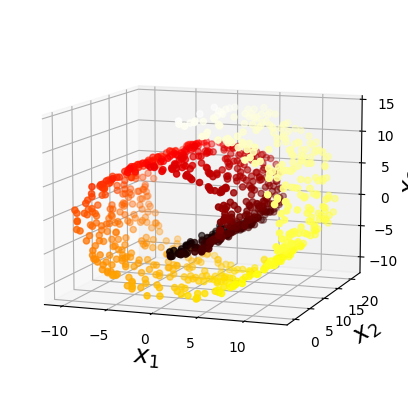

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

X_roll, y_roll = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_roll[:, 0], X_roll[:, 1], X_roll[:, 2], c=y_roll, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

Unlike PCA, t-SNE is not limited to linear projections, which makes it suited to all sorts of datasets.



## t-SNE Implementaion

In [ ]:

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std) 

## Visual Representation of t-SNE

In [ ]:
trace_TSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    name = str(Target),
    hovertext = [str(x) for x in Target],
    mode = 'markers',
    text = Target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Viridis',
        symbol = 'circle',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace_TSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(ticklen= 5,
                            zeroline= False,
                            gridwidth= 1,
                            showgrid = True,
                            gridcolor = 'lightgrey'),
              xaxis = dict(ticklen= 5,
                            zeroline= False,
                            gridwidth= 1,
                            showgrid = True,
                            gridcolor = 'lightgrey'),
              showlegend= False,

             )

fig_tsne = go.Figure(data=data, layout=layout)
fig_tsne.show(renderer = "colab")


## Interpretation

The t-SNE scatter plot shows that clusters are very clearly separated and look like modern art paintings. This is because the t-SNE algorithm can keep the structure of the data intact while reducing the dimensionality. However, t-SNE also has a problem: it may identify multiple sub-clusters and get stuck in different places, which means that clusters of the same color may exist in different parts of the plot.

# Conclusion

- This notebook covered three commonly used dimensionality reduction techniques - PCA, LDA, and t-SNE. 
- We learned about finding principal components and linear discriminants and the topology preserving capabilities of t-SNE. 
- We also discussed the advantages and disadvantages of supervised and unsupervised methods, and the KMeans clustering technique in unsupervised scenarios.


- Overall, the main takeaway is that each method has its strengths and weaknesses, and it's important to choose the appropriate method based on the specific situation at hand. 

# References

- https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b
- https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
- https://medium.com/aiskunks/linear-methods-to-reduce-the-curse-of-dimensionality-data-preprocessing-327ee544d6c4

# **MIT License**
Copyright (c) 2022 Vipul Rajderkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.